In [163]:
#import all the libraries needed

%matplotlib inline
#This command is used to display the maps in the jupyter notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC




(150, 2)


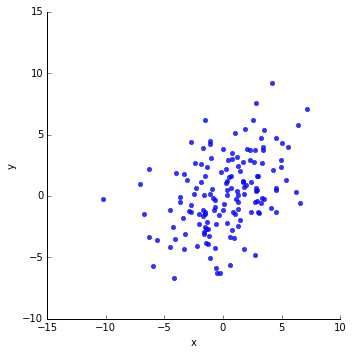

In [127]:
#Generating synstthetic data to test SVM
mean = (0,0)
cov = ((10,2),(5,10))
data = np.random.multivariate_normal(mean,cov,150)
#print(data)
print(np.shape(data))
df = pd.DataFrame(data,columns = ('x','y'))
sns.lmplot(x ='x',y = 'y', data = df,fit_reg=False)
label = np.zeros((150,1),dtype = int)
df['labels'] = label


(150, 2)


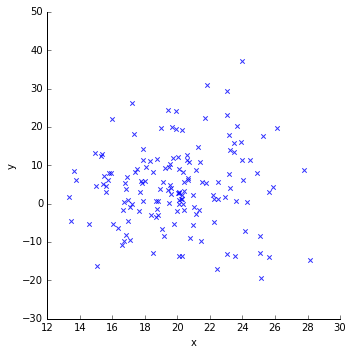

In [128]:
mean1 = (20,5)
cov1 = ((10,1),(2,100))
data1 = np.random.multivariate_normal(mean1,cov1,150)
print(np.shape(data1))
df1 = pd.DataFrame(data1,columns = ('x','y'))
df1['labels'] = np.ones((150,1),dtype = int)
sns.lmplot(x ='x',y = 'y', data = df1,fit_reg=False,markers = 'x')

(300, 3)


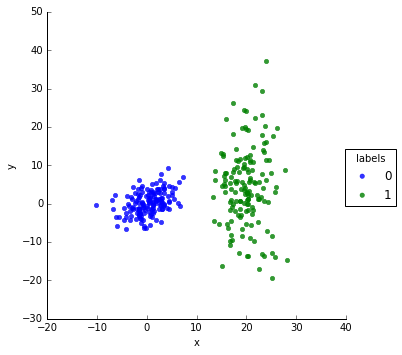

In [160]:
frames = [df,df1]
data = pd.concat(frames)
print(np.shape(data))
#data.head()
sns.lmplot(x = 'x', y = 'y',hue = 'labels',data = data,fit_reg=False)
d = data.iloc[:,2]
#print(d)

In [131]:

svm = SVC(kernel = 'linear',C = 1.0, random_state = 42)

svm.fit (data.iloc[:,:-1],data.iloc[:,2])

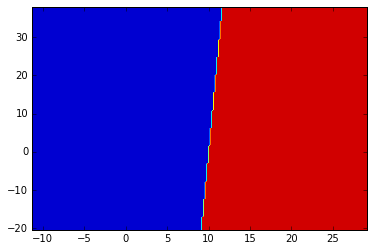

In [159]:
#Plotting the decision area

xmin,xmax = data.iloc[:,0].min() -1 , data.iloc[:,0].max() + 1
ymin,ymax = data.iloc[:,1].min() -1, data.iloc[:,1].max() + 1

xvalues = np.arange(xmin,xmax,0.2)
yvalues = np.arange(ymin,ymax,0.2)

x,y = np.meshgrid(xvalues,yvalues)

z = svm.predict(np.array([x.ravel(),y.ravel()]).T)
z = np.reshape(z,np.shape(x))
plt.contourf(x,y,z)




That's it! We have got the decision boundary!